<a href="https://colab.research.google.com/github/iam-Srini/KMeans/blob/main/Retail_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Import Dataset

In [6]:
raw_data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')


In [7]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
raw_data.shape

(541909, 8)

In [10]:
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Cleaning Data

In [11]:
raw_data['InvoiceDate'] = pd.to_datetime(raw_data['InvoiceDate'], errors='coerce')

In [12]:
raw_data = raw_data.dropna(subset=['Description','CustomerID'])

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  172782 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
raw_data['TotalSales']=raw_data['UnitPrice']*raw_data['Quantity']

<ipython-input-14-8ad289fc870a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['TotalSales']=raw_data['UnitPrice']*raw_data['Quantity']


In [15]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
customer_contribution = raw_data.groupby(by = 'CustomerID')['TotalSales'].sum()

In [17]:
customer_contribution

,TotalSales
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [18]:
customer_frequency = raw_data.groupby(by='CustomerID')['InvoiceNo'].count()

In [19]:
customer_frequency

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [50]:
customer_lastvisit = raw_data.groupby(by = 'CustomerID')['InvoiceDate'].max().reset_index()

In [51]:
customer_lastvisit.columns =  ['CustomerID','InvoiceDate']

In [52]:
customer_lastvisit

,CustomerID,InvoiceDate
0,12346.0,NaT
1,12347.0,2011-09-06 13:01:00
2,12348.0,2011-05-04 10:47:00
3,12349.0,NaT
4,12350.0,2011-02-02 16:01:00
...,...,...
4367,18280.0,2011-07-03 09:52:00
4368,18281.0,2011-12-06 10:53:00
4369,18282.0,2011-09-08 15:10:00
4370,18283.0,2011-10-11 15:07:00


In [53]:
customer_lastvisit

,CustomerID,InvoiceDate
0,12346.0,NaT
1,12347.0,2011-09-06 13:01:00
2,12348.0,2011-05-04 10:47:00
3,12349.0,NaT
4,12350.0,2011-02-02 16:01:00
...,...,...
4367,18280.0,2011-07-03 09:52:00
4368,18281.0,2011-12-06 10:53:00
4369,18282.0,2011-09-08 15:10:00
4370,18283.0,2011-10-11 15:07:00


In [54]:
Maximum = max(customer_lastvisit['InvoiceDate'].dropna())

In [55]:
Maximum

Timestamp('2011-12-10 17:19:00')

In [56]:
customer_lastvisit['Since_last_visit'] = Maximum - customer_lastvisit['InvoiceDate']

In [57]:
customer_lastvisit['Since_last_visit'] = customer_lastvisit['Since_last_visit'].dt.days

In [58]:
customer_lastvisit

,CustomerID,InvoiceDate,Since_last_visit
0,12346.0,NaT,NaN
1,12347.0,2011-09-06 13:01:00,95.0
2,12348.0,2011-05-04 10:47:00,220.0
3,12349.0,NaT,NaN
4,12350.0,2011-02-02 16:01:00,311.0
...,...,...,...
4367,18280.0,2011-07-03 09:52:00,160.0
4368,18281.0,2011-12-06 10:53:00,4.0
4369,18282.0,2011-09-08 15:10:00,93.0
4370,18283.0,2011-10-11 15:07:00,60.0


In [61]:
filtered_data = pd.merge(customer_contribution,customer_frequency,on='CustomerID', how='inner')

In [62]:
filtered_data

,TotalSales,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [63]:
filtered_data = pd.merge(filtered_data,customer_lastvisit,on='CustomerID', how='inner')

In [65]:
filtered_data.head()

,CustomerID,TotalSales,InvoiceNo,InvoiceDate,Since_last_visit
0,12346.0,0.00,2,NaT,NaN
1,12347.0,4310.00,182,2011-09-06 13:01:00,95.0
2,12348.0,1797.24,31,2011-05-04 10:47:00,220.0
3,12349.0,1757.55,73,NaT,NaN
4,12350.0,334.40,17,2011-02-02 16:01:00,311.0


In [69]:
filtered_data = filtered_data.drop('InvoiceDate', axis=1)

In [70]:
filtered_data.columns = ['CustomerID','TotalContribution','Frequency','Since_Last_Visit']

In [71]:
filtered_data.head()

,CustomerID,TotalContribution,Frequency,Since_Last_Visit
0,12346.0,0.00,2,NaN
1,12347.0,4310.00,182,95.0
2,12348.0,1797.24,31,220.0
3,12349.0,1757.55,73,NaN
4,12350.0,334.40,17,311.0


In [78]:
from scipy.stats import skew

skewness_value_TC = skew(filtered_data['TotalContribution'].dropna())
print("TotalContribution_Skewness:", skewness_value_TC)

skewness_value_F = skew(filtered_data['Frequency'].dropna())
print("Frequency_Skewness:", skewness_value_F)

skewness_value_S = skew(filtered_data['Since_Last_Visit'].dropna())
print("Since_Last_Visit_Skewness:", skewness_value_S)


TotalContribution_Skewness: 21.69783928687044
Frequency_Skewness: 18.147505951700815
Since_Last_Visit_Skewness: 1.565559388037721


In [79]:
import numpy as np

# Ensure there are no negative values (if needed)
# df['TotalContribution'] = df['TotalContribution'].clip(lower=1)

# Apply log transformation
filtered_data['Log_TotalContribution'] = np.log1p(filtered_data['TotalContribution'])  # log(1 + x)
filtered_data['Log_Frequency'] = np.log1p(filtered_data['Frequency'])
filtered_data['Log_Since_Last_Visit'] = np.log1p(filtered_data['Since_Last_Visit'].fillna(0))  # Handle NaN values

# Check the transformed data
print(filtered_data[['Log_TotalContribution', 'Log_Frequency', 'Log_Since_Last_Visit']].head())

   Log_TotalContribution  Log_Frequency  Log_Since_Last_Visit
0               0.000000       1.098612              0.000000
1               8.368925       5.209486              4.564348
2               7.494564       3.465736              5.398163
3               7.472245       4.304065              0.000000
4               5.815324       2.890372              5.743003


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [81]:
skewness_value_TC = skew(filtered_data['Log_TotalContribution'].dropna())
print("TotalContribution_Skewness:", skewness_value_TC)

skewness_value_F = skew(filtered_data['Log_Frequency'].dropna())
print("Frequency_Skewness:", skewness_value_F)

skewness_value_S = skew(filtered_data['Log_Since_Last_Visit'].dropna())
print("Since_Last_Visit_Skewness:", skewness_value_S)

TotalContribution_Skewness: -0.04292799396313324
Frequency_Skewness: -0.035141868697024126
Since_Last_Visit_Skewness: -0.3329065484486151


In [82]:
filtered_data.head()

,CustomerID,TotalContribution,Frequency,Since_Last_Visit,Log_TotalContribution,Log_Frequency,Log_Since_Last_Visit
0,12346.0,0.00,2,NaN,0.000000,1.098612,0.000000
1,12347.0,4310.00,182,95.0,8.368925,5.209486,4.564348
2,12348.0,1797.24,31,220.0,7.494564,3.465736,5.398163
3,12349.0,1757.55,73,NaN,7.472245,4.304065,0.000000
4,12350.0,334.40,17,311.0,5.815324,2.890372,5.743003


In [84]:
filtered_data.drop(['TotalContribution','Frequency','Since_Last_Visit'], axis=1)

,CustomerID,Log_TotalContribution,Log_Frequency,Log_Since_Last_Visit
0,12346.0,0.000000,1.098612,0.000000
1,12347.0,8.368925,5.209486,4.564348
2,12348.0,7.494564,3.465736,5.398163
3,12349.0,7.472245,4.304065,0.000000
4,12350.0,5.815324,2.890372,5.743003
...,...,...,...,...
4367,18280.0,5.201806,2.397895,5.081404
4368,18281.0,4.404522,2.079442,1.609438
4369,18282.0,5.179534,2.639057,4.543295
4370,18283.0,7.647729,6.629363,4.110874


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

# Select only the columns to be scaled (exclude CustomerID)
columns_to_scale = ['Log_TotalContribution', 'Log_Frequency', 'Log_Since_Last_Visit']

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(filtered_data[columns_to_scale]), columns=columns_to_scale)

# Optionally, add back the 'CustomerID' column if you want to retain it
df_scaled['CustomerID'] = filtered_data['CustomerID']

# Check the scaled data
print(df_scaled)

      Log_TotalContribution  Log_Frequency  Log_Since_Last_Visit  CustomerID
0                 -5.053011      -2.094041             -1.330298     12346.0
1                  1.401764       1.161820              0.626183     12347.0
2                  0.727388      -0.219251              0.983592     12348.0
3                  0.710174       0.444715             -1.330298     12349.0
4                 -0.567774      -0.674946              1.131406     12350.0
...                     ...            ...                   ...         ...
4367              -1.040967      -1.064994              0.847816     18280.0
4368              -1.655896      -1.317213             -0.640422     18281.0
4369              -1.058146      -0.873990              0.617158     18282.0
4370               0.845521       2.286379              0.431804     18283.0
4371               0.744373       0.411938             -1.330298     18287.0

[4372 rows x 4 columns]


In [94]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Log_TotalContribution  4331 non-null   float64
 1   Log_Frequency          4372 non-null   float64
 2   Log_Since_Last_Visit   4372 non-null   float64
 3   CustomerID             4372 non-null   float64
dtypes: float64(4)
memory usage: 136.8 KB


In [97]:
df_scaled = df_scaled.dropna()

In [110]:
kmeans_scaled = KMeans(n_clusters=3, n_init=10)
kmeans_scaled.fit(df_scaled.drop(columns=['CustomerID']))


KMeans(n_clusters=3, n_init=10)

In [111]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(df_scaled)
  wcss_val = kmeans.inertia_
  wcss.append(wcss_val)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Within-cluster Sum of Squares')

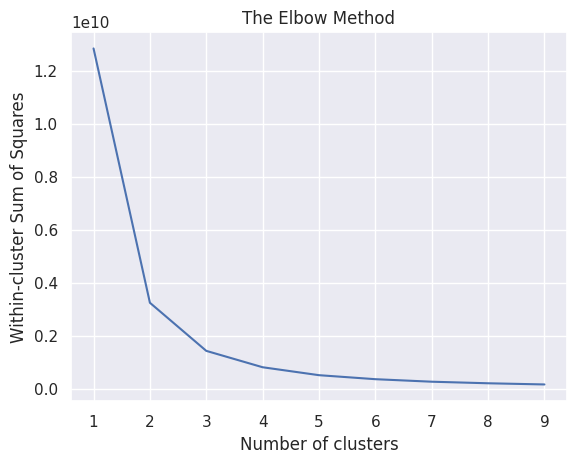

In [112]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [113]:
print("Cluster Centers:\n", kmeans_scaled.cluster_centers_)

Cluster Centers:
 [[ 0.96899433  0.99190932  0.27141101]
 [-0.56865463 -0.54451883 -1.28352323]
 [-0.51681472 -0.50978339  0.84840584]]


In [114]:
df_scaled['Cluster'] = kmeans_scaled.labels_

<ipython-input-114-7de8eefbf062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled['Cluster'] = kmeans_scaled.labels_


In [115]:
cluster_summary = df_scaled.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          Log_TotalContribution  Log_Frequency  Log_Since_Last_Visit  \
Cluster                                                               
0                     0.967010       0.991174              0.272391   
1                    -0.568655      -0.544519             -1.283523   
2                    -0.517747      -0.512069              0.848547   

           CustomerID  
Cluster                
0        15223.059164  
1        15342.620690  
2        15339.608430  


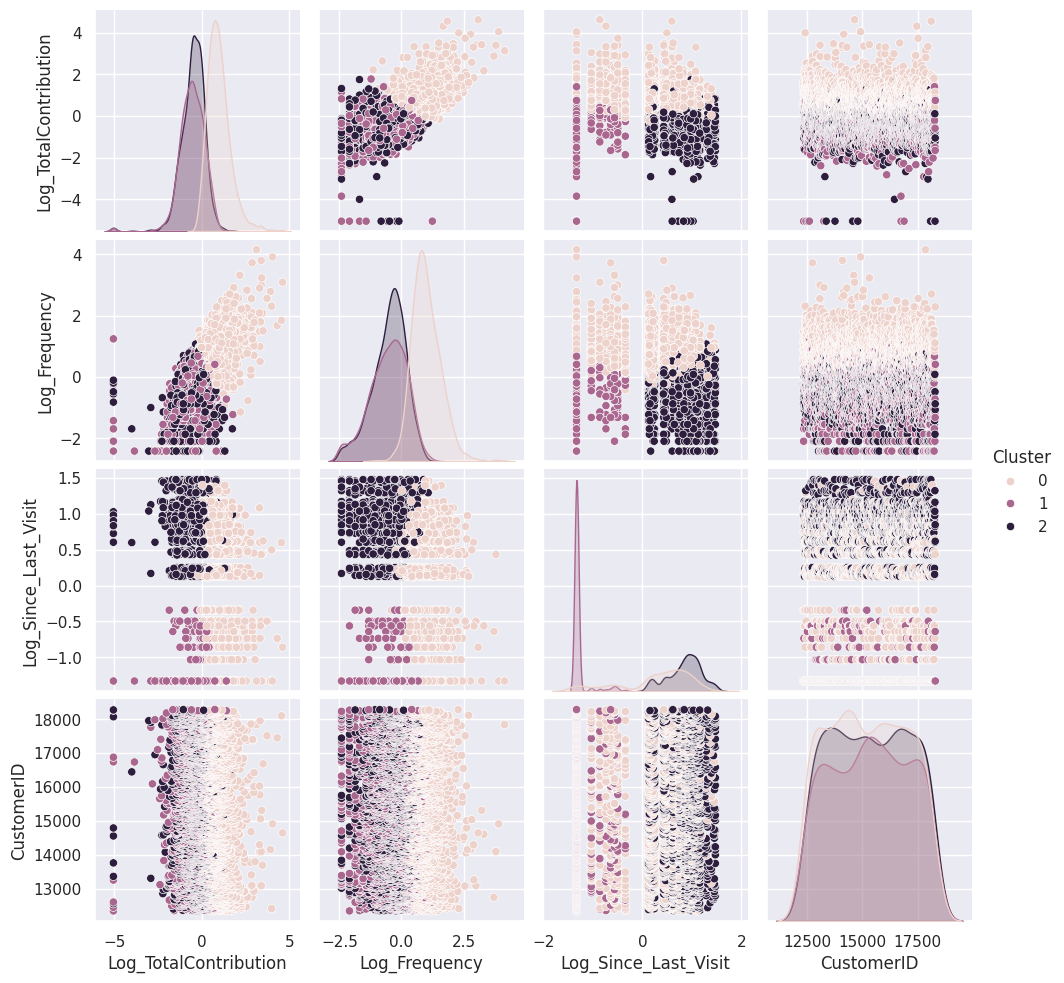

In [116]:
sns.pairplot(df_scaled, hue='Cluster')


**Results and Insights:**

High-Value Customers (Cluster 0): Customers with high spending, frequent visits, and recent activity. Ideal for targeted loyalty programs.
Low-Value Customers (Cluster 1): Customers with low engagement and spending. Potential focus for re-engagement strategies.
Moderate Engagement (Cluster 2): Customers with moderate activity but recent visits. Opportunities for upselling or increased engagement.